# 初步处理数据 Visualize the data in heatmap

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib.colors import BoundaryNorm

In [46]:
data = np.loadtxt('F:\data.txt')
df = pd.DataFrame(data)

In [54]:
df = df.iloc[1:] # 删除第一行 第一个数据可能不准确

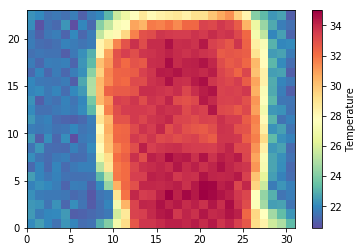

In [45]:
# 按热力图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
temperature = df.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
c = ax.pcolormesh(X, Y, temperature0, cmap='Spectral_r')
cb = fig.colorbar(c)
cb.set_label('Temperature')
plt.show()

# 尝试让温度分区更加细一点，能不能划分出面部结构 Higher sensitivity heat map

In [213]:
# 让脸部温度单独保存，环境温度设计为统一值
ta = df.min(axis=1)

df_face = pd.DataFrame()
df_onlyface = pd.DataFrame()
for i, minTa in zip(df.values, ta):
    face = []
    onlyface = []
    for j in i:
        if j - minTa > 7:
            face.append(j)
            onlyface.append(j)
        else:
            face.append(minTa)
    face_todf = pd.DataFrame(face).T
    onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0)
    df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0)

In [214]:
df_onlyface.index = range(df_onlyface.shape[0])

结果表现一般，用90640区分脸部不同区域存在较大困难，先探究温度点频数和热舒适度的联系

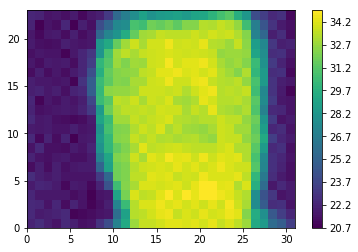

In [97]:
# 设计更细致的温度分级（成不同颜色）
cmap = plt.get_cmap(name='Spectral_r')
levels = MaxNLocator(nbins=100).tick_values(temperature_i.min(), temperature_i.max())  # 分成binb
norm = BoundaryNorm(levels, ncolors=cmap.N, clip=True)

# 把温度处理成矩阵
temperature_i = df_face.iloc[20]
temperature0 = np.zeros([24, 32]) 
k = 0
for i in range(24):
    for j in range(32):
        temperature0[-1-i, -1-j] = temperature[k] #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
        k += 1

fig = plt.figure()
ax0 = fig.add_subplot(1, 1, 1)
im = ax0.pcolormesh(X, Y, temperature0, norm=norm)
fig.colorbar(im, ax=ax0)
plt.show()

# 等高线 contour

## 舒适情况下脸部温度等高线

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
# from matplotlib.colors import BoundaryNorm

In [112]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[5])  
df_temp = pd.read_csv('./raw_data/'+file_list[5])    

data_20190309_1342_2.csv


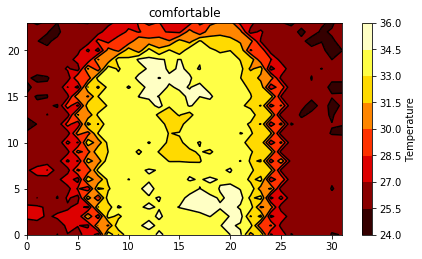

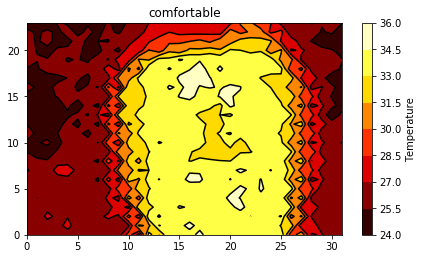

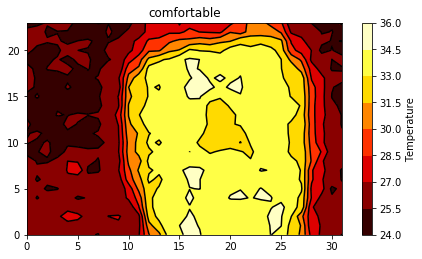

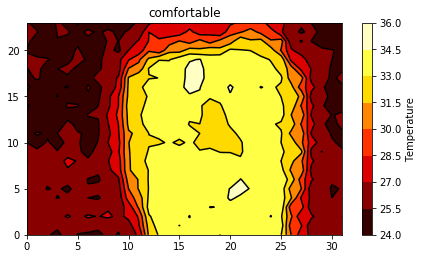

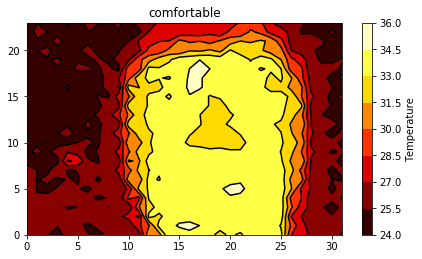

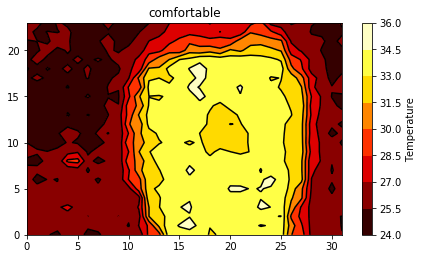

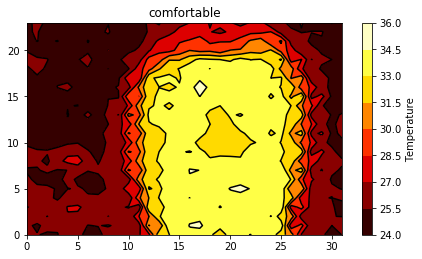

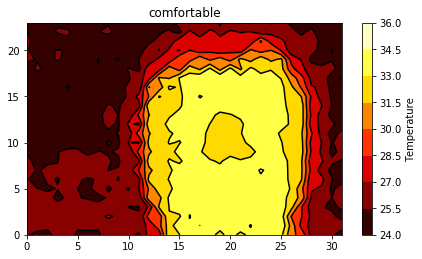

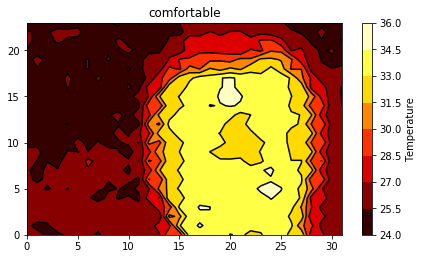

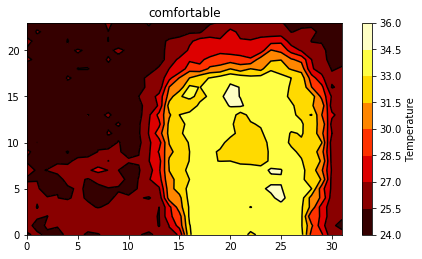

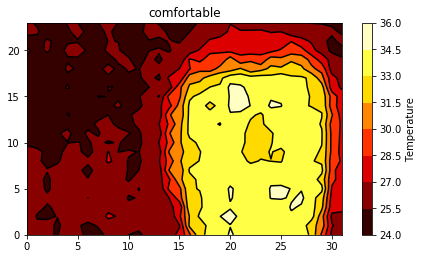

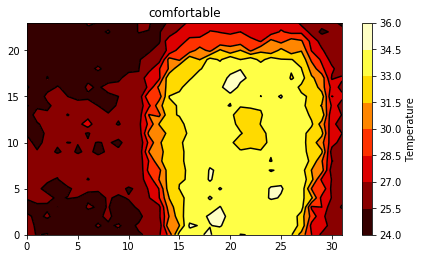

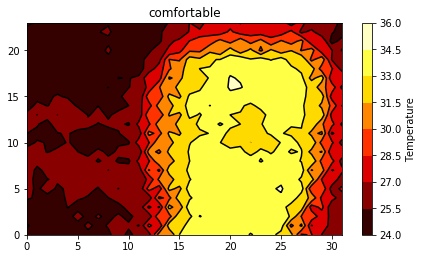

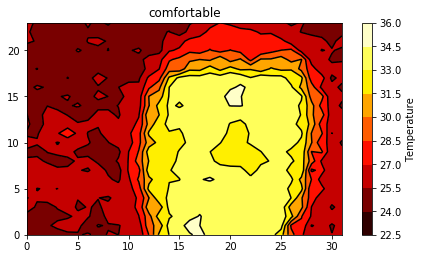

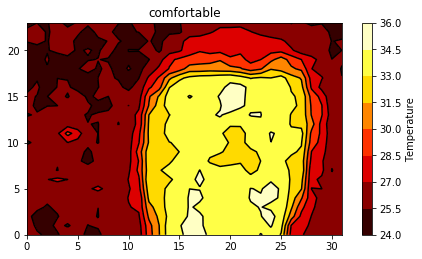

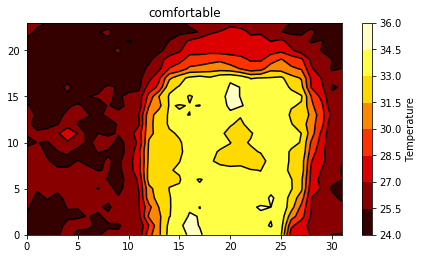

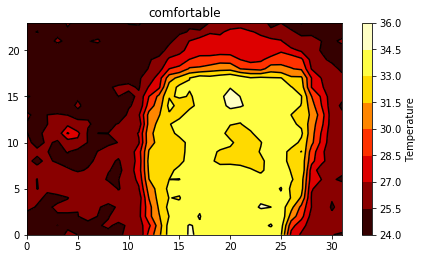

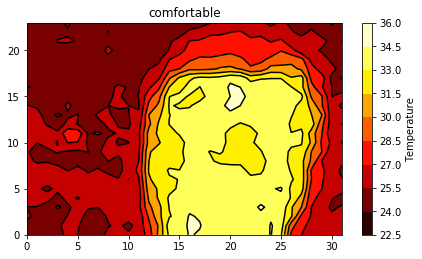

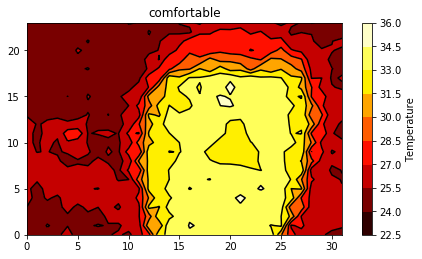

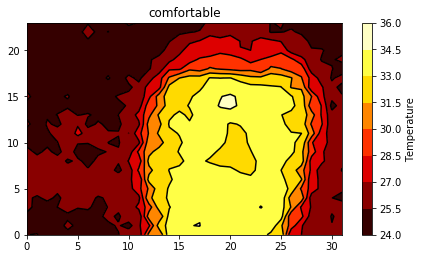

In [113]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))

for l in range(20):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))

for l in range(20):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            try:
                temperature0[-1-i, -1-j] = temperature[k] 
                #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
                k += 1
            except:
                temperature0[-1-i, -1-j] = float(temperature[k][:5])
                k += 1
            
    fig = plt.figure(figsize=(24,32))
    plt.subplot(7, 3, l+1)
    c = plt.contourf(X, Y, temperature0, cmap=plt.cm.hot)
    plt.contour(X, Y, temperature0, colors='black', linewidth=.5)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('comfortable')
    plt.show()

## 过冷的情况下

In [106]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[1])  
df_temp = pd.read_csv('./raw_data/'+file_list[1])    

data_20190303_1035_0.csv


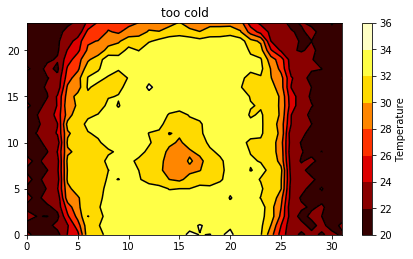

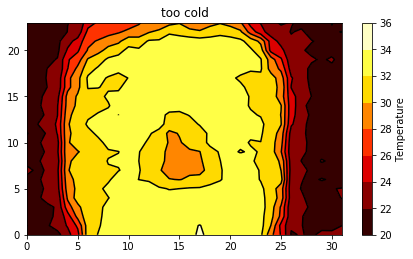

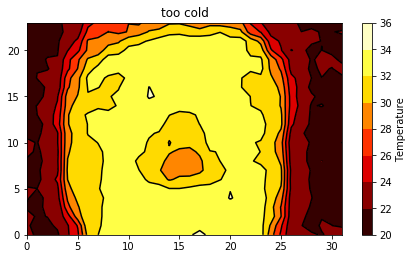

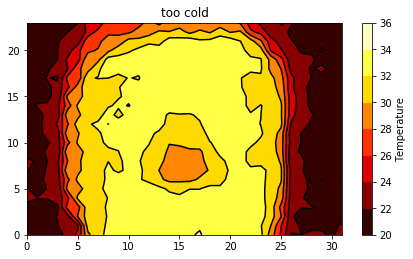

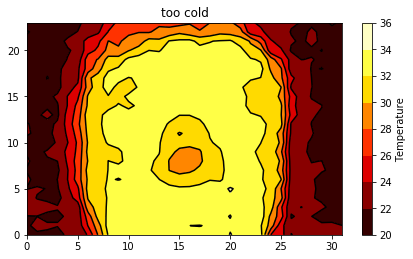

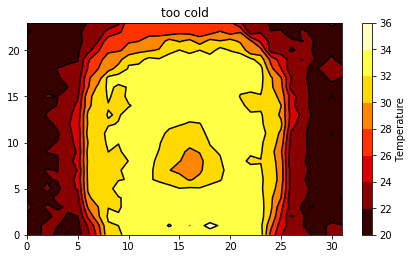

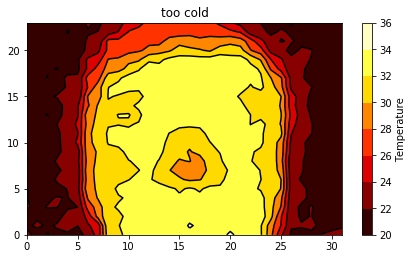

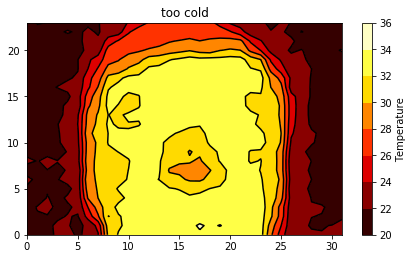

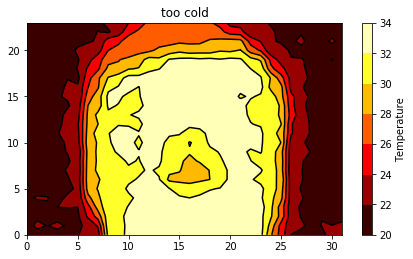

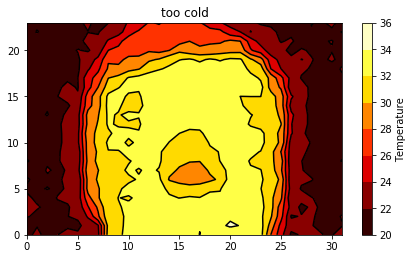

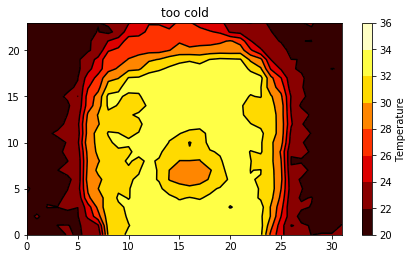

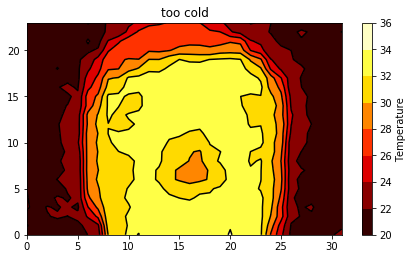

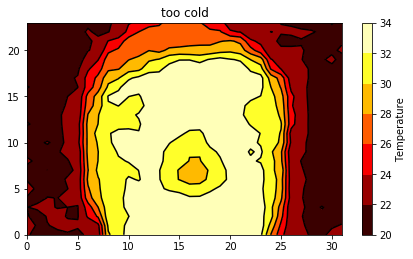

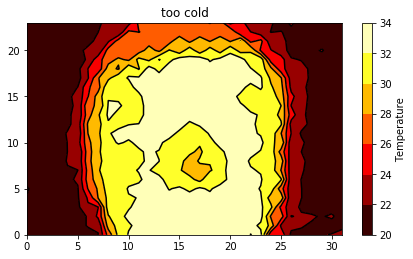

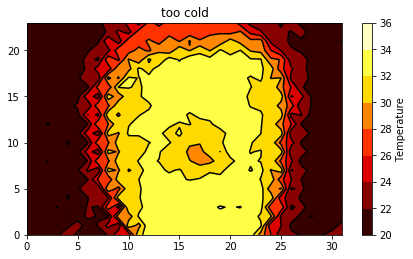

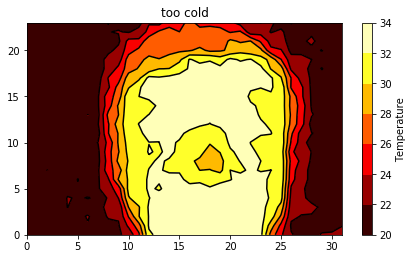

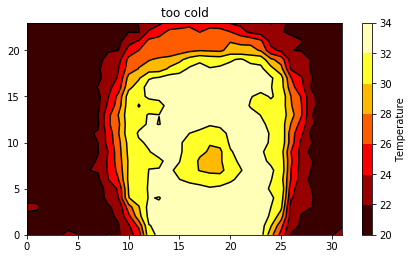

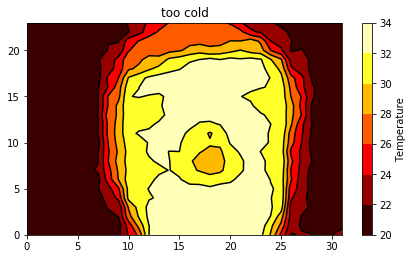

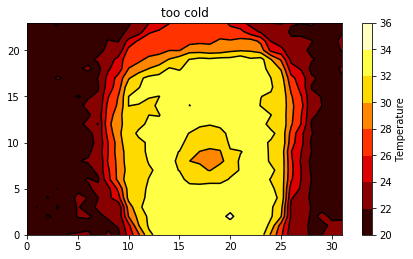

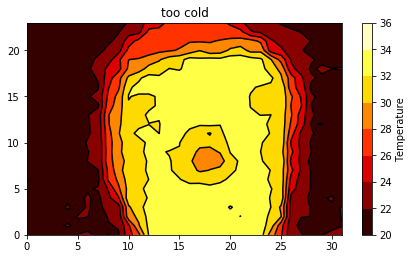

In [111]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))

for l in range(20):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            try:
                temperature0[-1-i, -1-j] = temperature[k] 
                #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
                k += 1
            except:
                temperature0[-1-i, -1-j] = float(temperature[k][:5])
                k += 1
            
    fig = plt.figure(figsize=(24,32))
    plt.subplot(7, 3, l+1)
    c = plt.contourf(X, Y, temperature0, cmap=plt.cm.hot)
    plt.contour(X, Y, temperature0, colors='black', linewidth=.5)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('too cold')
    plt.show()

## 热的情况下

In [36]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[4])  
df_temp = pd.read_csv('./raw_data/'+file_list[4])    

data_20190309_1336_3.csv


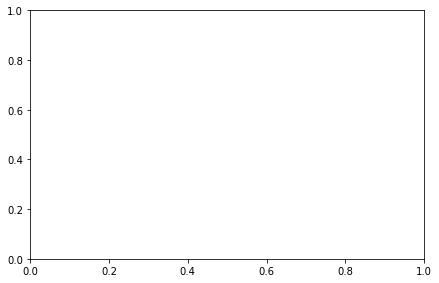

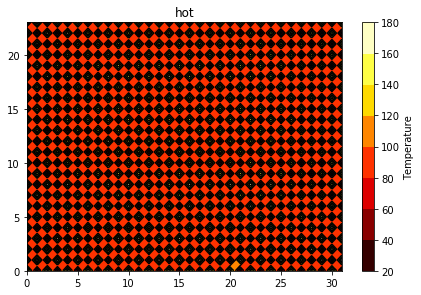

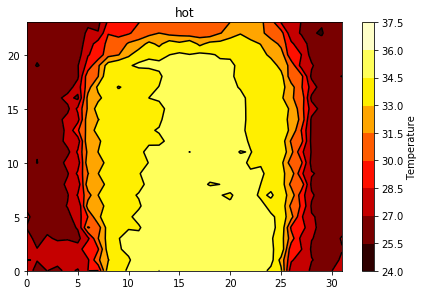

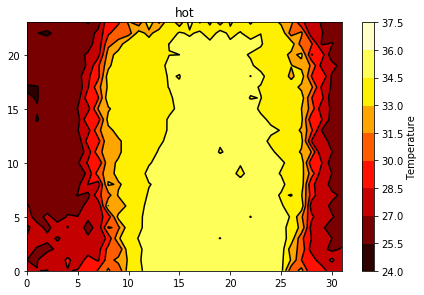

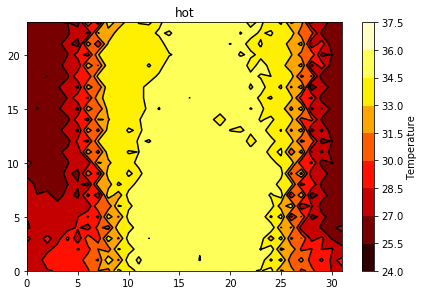

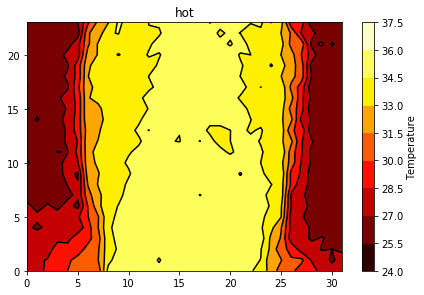

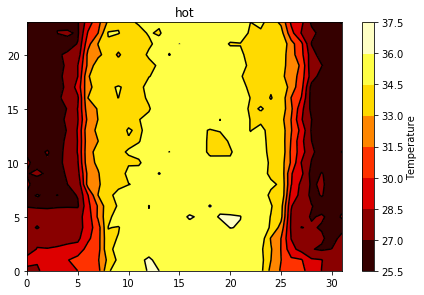

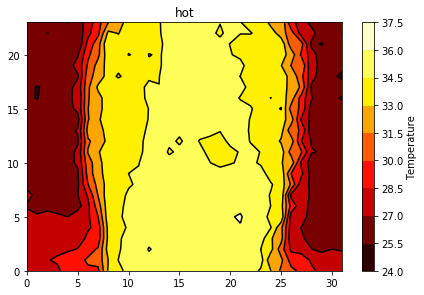

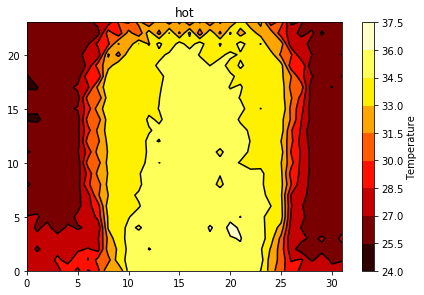

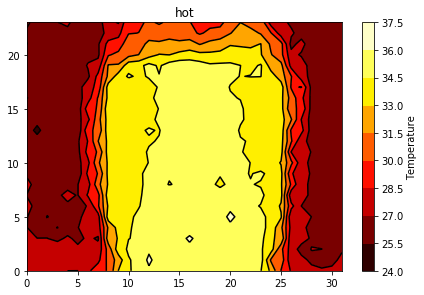

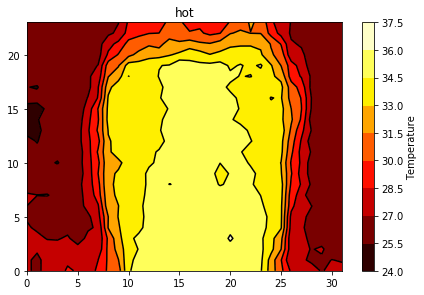

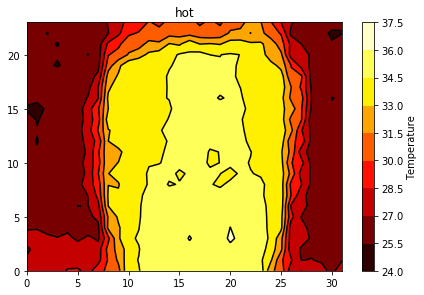

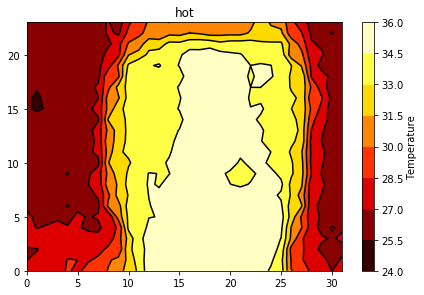

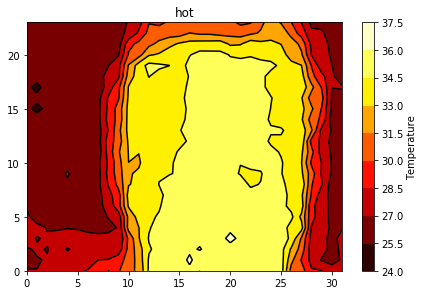

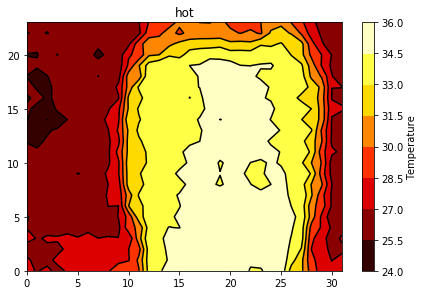

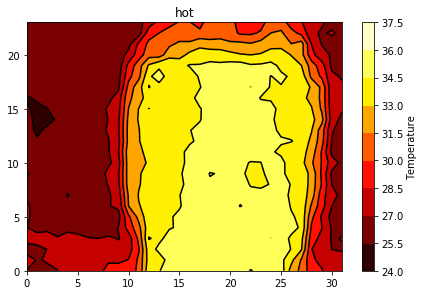

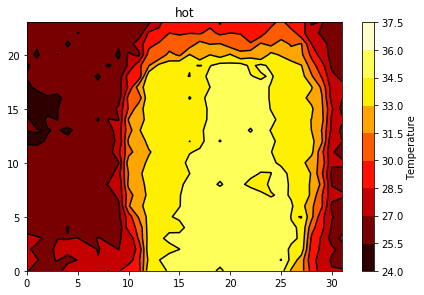

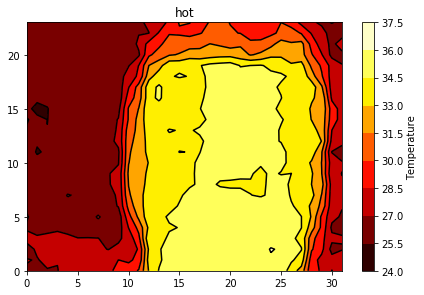

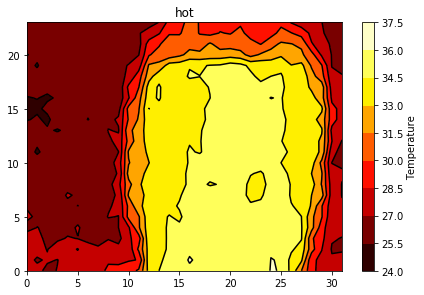

In [39]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))

# 注意：下边有三个for 里面循环的l,i,j不能一样 否则会被覆写
for l in range(18):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    plt.subplot(6, 3, l+1)
    c = plt.contourf(X, Y, temperature0, cmap=plt.cm.hot, corner_mask=True)
    plt.contour(X, Y, temperature0, colors='black', linewidth=.5)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('hot')
    plt.show()

# 冷的情况下

In [14]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[-1])  
df_temp = pd.read_csv('./raw_data/'+file_list[-1])    

data_20190309_1413_1.csv


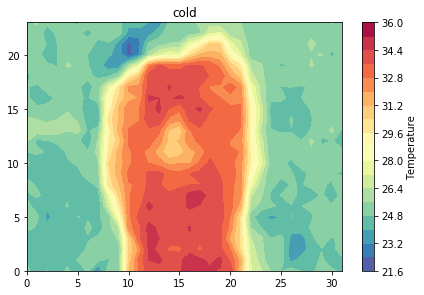

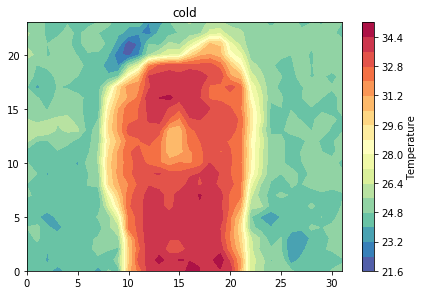

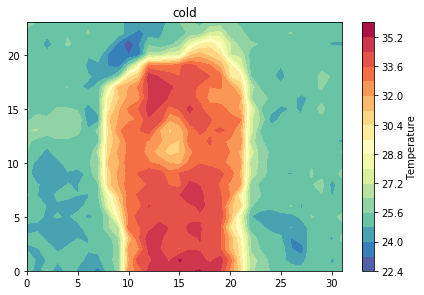

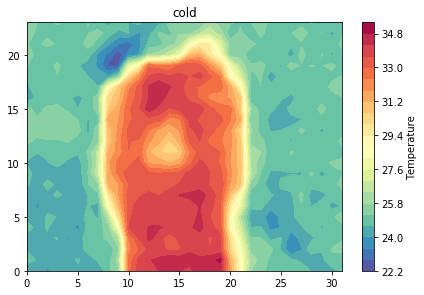

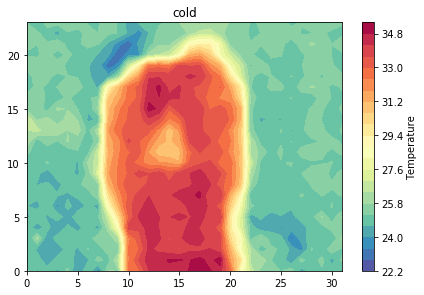

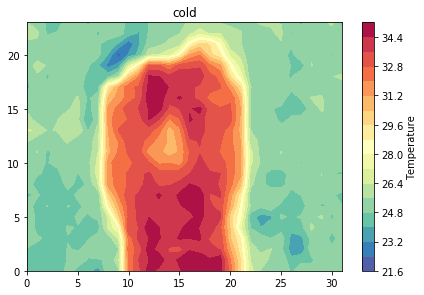

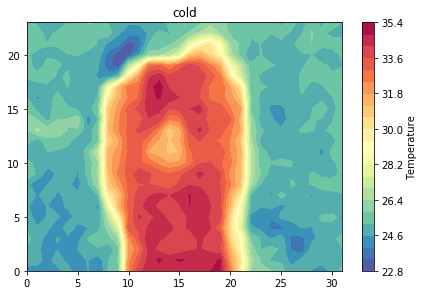

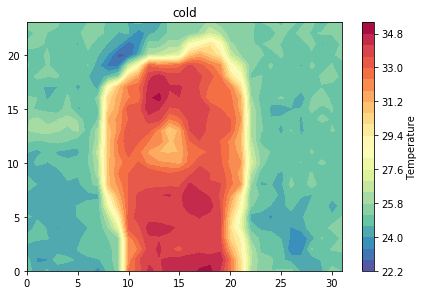

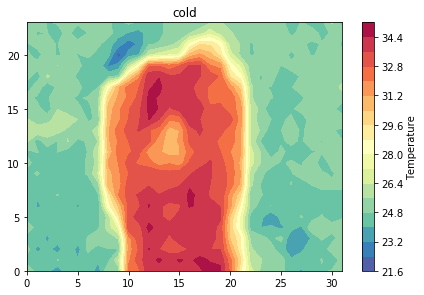

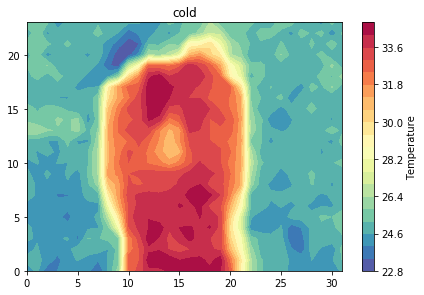

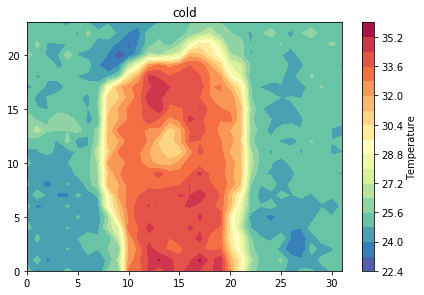

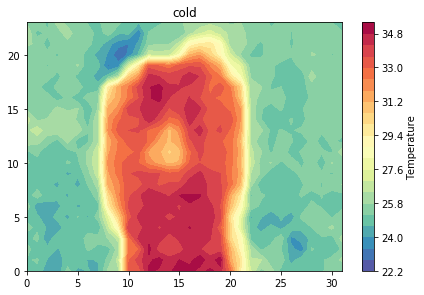

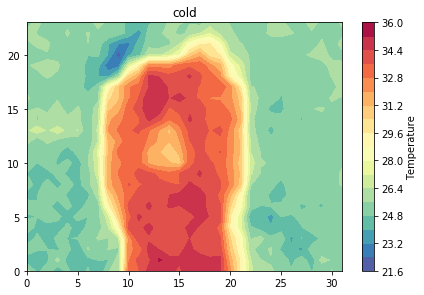

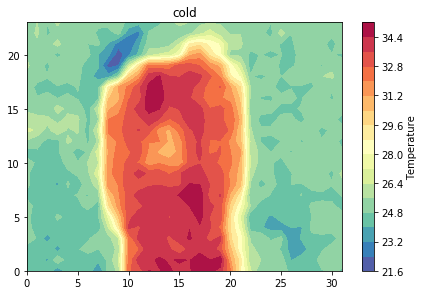

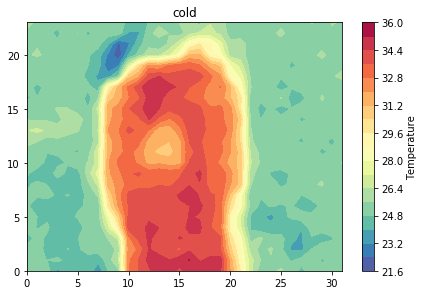

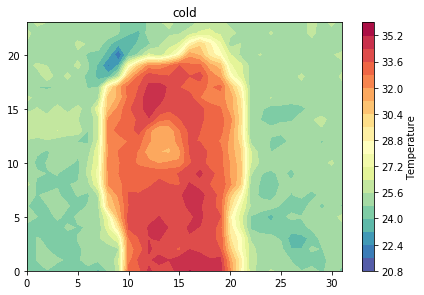

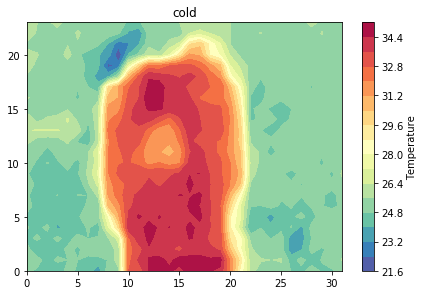

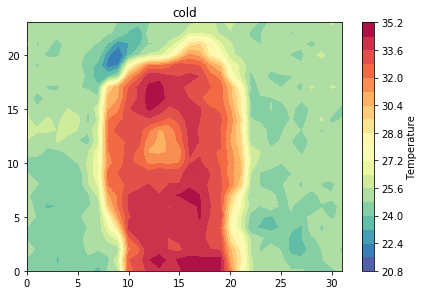

In [19]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
for l in range(18):
    temperature = df_temp.iloc[l]
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(24, 32))
    plt.subplot(6, 3, l+1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=20)
#     plt.contour(X, Y, temperature0, colors='black', linewidth=.001, levels=15)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('cold')
    plt.show()

# 只有脸部温度

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from matplotlib.ticker import MaxNLocator
# from matplotlib.colors import BoundaryNorm

In [36]:
import pandas as pd
import os
import numpy as np

# file_dir = os.getcwd()
# raw_data_dir = os.path.join(file_dir, '/raw_data')
file_list = []

for root, dirs, files in os.walk('./raw_data'):
    for file in files:
        if os.path.splitext(file)[1] == '.csv':
        # 排除掉readme.md等非csv文件
            file_list.append(file)

print(file_list[-1])  
df_temp = pd.read_csv('./raw_data/'+file_list[-1])    
ta = df_temp.min(axis=1)

df_face = pd.DataFrame()
# df_face 脸部温度+其他区域温度置换为环境温度
df_onlyface = pd.DataFrame()
# df_onlyface 只有脸部温度点


for i, minTa in zip(df_temp.values, ta):
    face = []
    onlyface = []
    for j in i:
        try:
        # 因为检查到有一些数字不是float是str，像21.42346.1，不知是什么原因导致的，
            if j - minTa > 4.7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
        except:
            j = float(j[:6])
            if j - minTa > 4.7:
                face.append(j)
                onlyface.append(j)
            else:
                face.append(minTa)
    face_todf = pd.DataFrame(face).T
#     onlyface_todf = pd.DataFrame(onlyface).T
    df_face = pd.concat([df_face, face_todf], axis = 0, ignore_index=True)
#     df_onlyface = pd.concat([df_onlyface, onlyface_todf], axis = 0, ignore_index=True)

data_20190309_1413_1.csv


In [3]:
df_face

0         1         2         3         4         5         6    \
0    22.15869  22.15869  22.15869  22.15869  22.15869  22.15869  22.15869   
1    21.68411  21.68411  21.68411  21.68411  21.68411  21.68411  21.68411   
2    22.44522  22.44522  22.44522  22.44522  22.44522  22.44522  22.44522   
3    22.41922  22.41922  22.41922  22.41922  22.41922  22.41922  22.41922   
4    22.78302  22.78302  22.78302  22.78302  22.78302  22.78302  22.78302   
5    22.01193  22.01193  22.01193  22.01193  22.01193  22.01193  22.01193   
6    22.96387  22.96387  22.96387  22.96387  22.96387  22.96387  22.96387   
7    22.59109  22.59109  22.59109  22.59109  22.59109  22.59109  22.59109   
8    21.92240  21.92240  21.92240  21.92240  21.92240  21.92240  21.92240   
9    22.97373  22.97373  22.97373  22.97373  22.97373  22.97373  22.97373   
10   22.58887  22.58887  22.58887  22.58887  22.58887  22.58887  22.58887   
11   22.78189  22.78189  22.78189  22.78189  22.78189  22.78189  22.78189   
12   22.00647  22.00647  22.00647  22.00647  22.00647  22.00647  22.00647   
13   21.79831  21.79831  21.79831  21.79831  21.79831  21.79831  21.79831   
14   21.79953  21.79953  21.79953  21.79953  21.79953  21.79953  21.79953   
15   21.58646  21.58646  21.58646  21.58646  21.58646  21.58646  21.58646   
16   21.76282  21.76282  21.76282  21.76282  21.76282  21.76282  21.76282   
17   21.36850  21.36850  21.36850  21.36850  21.36850  21.36850  21.36850   
18   21.46262  21.46262  21.46262  21.46262  21.46262  21.46262  21.46262   
19   21.65256  21.65256  21.65256  21.65256  21.65256  21.65256  21.65256   
20   21.34271  21.34271  21.34271  21.34271  21.34271  21.34271  21.34271   
21   21.40009  21.40009  21.40009  21.40009  21.40009  21.40009  21.40009   
22   20.91174  20.91174  20.91174  20.91174  20.91174  20.91174  20.91174   
23   21.30109  21.30109  21.30109  21.30109  21.30109  21.30109  21.30109   
24   21.87250  21.87250  21.87250  21.87250  21.87250  21.87250  21.87250   
25   21.79004  21.79004  21.79004  21.79004  21.79004  21.79004  21.79004   
26   21.80057  21.80057  21.80057  21.80057  21.80057  21.80057  21.80057   
27   22.15494  22.15494  22.15494  22.15494  22.15494  22.15494  22.15494   
28   21.35757  21.35757  21.35757  21.35757  21.35757  21.35757  21.35757   
29   22.02389  22.02389  22.02389  22.02389  22.02389  22.02389  22.02389   
..        ...       ...       ...       ...       ...       ...       ...   
76   22.22522  22.22522  22.22522  22.22522  22.22522  22.22522  22.22522   
77   21.94873  21.94873  21.94873  21.94873  21.94873  21.94873  21.94873   
78   22.20636  22.20636  22.20636  22.20636  22.20636  22.20636  22.20636   
79   21.72919  21.72919  21.72919  21.72919  21.72919  21.72919  21.72919   
80   22.43008  22.43008  22.43008  22.43008  22.43008  22.43008  22.43008   
81   21.91644  21.91644  21.91644  21.91644  21.91644  21.91644  21.91644   
82   22.61047  22.61047  22.61047  22.61047  22.61047  22.61047  22.61047   
83   22.62891  22.62891  22.62891  22.62891  22.62891  22.62891  22.62891   
84   22.68771  22.68771  22.68771  22.68771  22.68771  22.68771  22.68771   
85   21.91180  21.91180  21.91180  21.91180  21.91180  21.91180  21.91180   
86   22.58353  22.58353  22.58353  22.58353  22.58353  22.58353  22.58353   
87   22.68146  22.68146  22.68146  22.68146  22.68146  22.68146  22.68146   
88   22.48667  22.48667  22.48667  22.48667  22.48667  22.48667  22.48667   
89   22.18173  22.18173  22.18173  22.18173  22.18173  22.18173  22.18173   
90   22.67941  22.67941  22.67941  22.67941  22.67941  22.67941  22.67941   
91   22.68121  22.68121  22.68121  22.68121  22.68121  22.68121  22.68121   
92   22.27982  22.27982  22.27982  22.27982  22.27982  22.27982  22.27982   
93   22.48416  22.48416  22.48416  22.48416  22.48416  22.48416  22.48416   
94   21.97534  21.97534  21.97534  21.97534  21.97534  21.97534  21.97534   
95   22.27423  22.27423  22.27423  22.27423  22.27423  22.27423  22.27423   
96   2

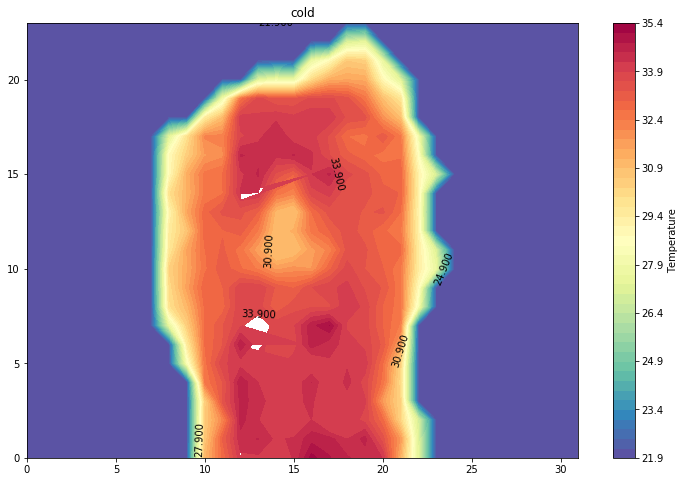

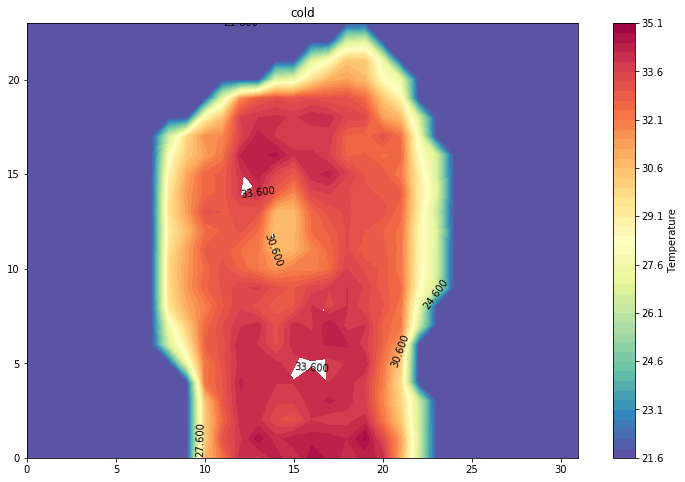

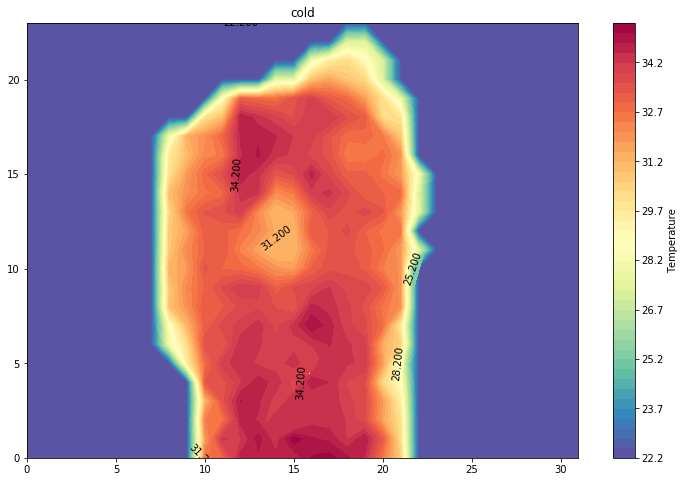

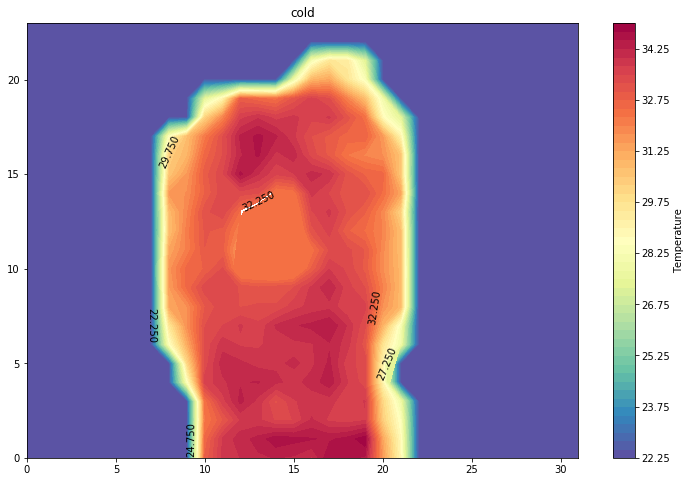

IndexError: list index out of range

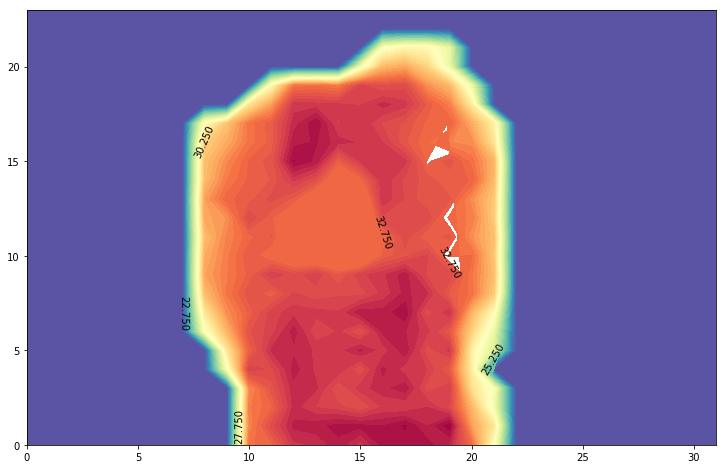

In [53]:
# 按等高线图画出温度分布
X, Y = np.meshgrid(np.linspace(0, 31, 32), np.linspace(0, 23, 24))
for l in range(18):
    temperature = df_face.iloc[l].values
    temperature0 = np.zeros([24, 32]) 
    k = 0

    # 把温度点按照排成32*24
    for i in range(24):
        for j in range(32):
            temperature0[-1-i, -1-j] = temperature[k] 
            #之所以要-1-j是因为temperature0矩阵的第一行对应的其实是图的最下面一行
            k += 1

    fig = plt.figure(figsize=(42, 56)) 
    # 固定24:32的比例    
    plt.subplot(6, 3, l+1)
    c = plt.contourf(X, Y, temperature0, cmap='Spectral_r', levels=50)
    plt.clabel(c, c.levels[::10], inline=1, fontsize=10, colors='black', rightside_up=True)
#     plt.contour(X, Y, temperature0, colors='black', linewidth=.5)
    cb = fig.colorbar(c)
    cb.set_label('Temperature')
    plt.title('cold')
    plt.show()